In [1]:
import numpy as np
import pandas as pd

data_raw = pd.read_parquet("vhrdata").drop_duplicates(subset=None, keep='last', inplace=False)
drop_columns = ["ebs_Q_Charge", "ebs_Q_Discharge", "BCM_ebs_I_BATT", "dcdc_OverTemperature","IC_LowBatteryvoltage", "DCDC_realInputVoltage", "DCDC_realInputCurrent"]
data_raw = data_raw.drop(columns=drop_columns)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672419 entries, 0 to 1672418
Data columns (total 46 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   vin                       1672419 non-null  object 
 1   collect_ts                1672419 non-null  int64  
 2   uuid                      1672419 non-null  object 
 3   model_name                1672419 non-null  object 
 4   series_code               1672419 non-null  object 
 5   msg_create_time           1672419 non-null  object 
 6   vcu_VehicleMode           1670933 non-null  float32
 7   vcu_vehicleSpeed          1670936 non-null  float32
 8   VCU_VehicleSpeedValid     1670936 non-null  float32
 9   vcu_state                 1672019 non-null  float32
 10  bms_SOC                   1668674 non-null  float32
 11  bms_state                 1672419 non-null  float32
 12  BCM_ebs_U_BATT            166432 non-null   float32
 13  BCM_ebs_SOC               1

In [ ]:
data_raw.head(20)

In [10]:
# 填充操作
data= data_raw[data_raw.vin == 'LM8F7D99XNA019581'].fillna(method='bfill').sort_values(by="collect_ts")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7044 entries, 752219 to 716978
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vin                       7044 non-null   object 
 1   collect_ts                7044 non-null   int64  
 2   uuid                      7044 non-null   object 
 3   model_name                7044 non-null   object 
 4   series_code               7044 non-null   object 
 5   msg_create_time           7044 non-null   object 
 6   vcu_VehicleMode           7044 non-null   float32
 7   vcu_vehicleSpeed          7044 non-null   float32
 8   VCU_VehicleSpeedValid     7044 non-null   float32
 9   vcu_state                 7044 non-null   float32
 10  bms_SOC                   7044 non-null   float32
 11  bms_state                 7044 non-null   float32
 12  BCM_ebs_U_BATT            7044 non-null   float32
 13  BCM_ebs_SOC               7044 non-null   float32
 14  BCM_eb

In [11]:
data = data[(data["BCM_ebs_U_BATT"] > 3.) & (data["BCM_ebs_U_BATT"] < 18.)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7044 entries, 752219 to 716978
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vin                       7044 non-null   object 
 1   collect_ts                7044 non-null   int64  
 2   uuid                      7044 non-null   object 
 3   model_name                7044 non-null   object 
 4   series_code               7044 non-null   object 
 5   msg_create_time           7044 non-null   object 
 6   vcu_VehicleMode           7044 non-null   float32
 7   vcu_vehicleSpeed          7044 non-null   float32
 8   VCU_VehicleSpeedValid     7044 non-null   float32
 9   vcu_state                 7044 non-null   float32
 10  bms_SOC                   7044 non-null   float32
 11  bms_state                 7044 non-null   float32
 12  BCM_ebs_U_BATT            7044 non-null   float32
 13  BCM_ebs_SOC               7044 non-null   float32
 14  BCM_eb

In [ ]:
pd.DataFrame(data["BCM_ebs_U_BATT"].value_counts()).sort_values(by='BCM_ebs_U_BATT')

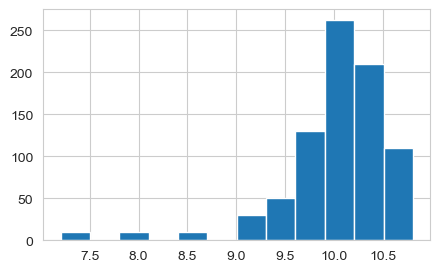

In [12]:
import matplotlib.pyplot as plt
data[(data["BCM_ebs_U_BATT"] > 3.) & (data["BCM_ebs_U_BATT"] < 11.)].BCM_ebs_U_BATT.hist(bins=12, figsize=(5,3))
plt.show()

In [13]:
data_copy = data.copy()

data_copy['date'] = pd.to_datetime(data_copy["collect_ts"], unit='ms')

data_copy = data_copy.set_index("date")
data_copy

,vin,collect_ts,uuid,model_name,series_code,msg_create_time,vcu_VehicleMode,vcu_vehicleSpeed,VCU_VehicleSpeedValid,vcu_state,...,bms_pLimitDrive,bms_pLimitRegen,bcm_HvOnRequest,esc_vehicleSpeed,esc_vehicleSpeedValid,ac_ambientTemp,ac_ambientTempValid,vcu_highVoltageIndicator,bcm_HvOffRequest,BCM_EBS_State
date,,,,,,,,,,,,,,,,,,,,,
2023-04-02 04:01:21.993,LM8F7D99XNA019581,1680408081993,LM8F7D99XNA019581#1682433039291#7834,赛力斯X1_2022_四驱旗舰版_B24ERF8JF4L00,SERES-X1,1682433039267,2.0,0.00000,0.0,0.0,...,276.5,-144.0,0.0,0.00000,1.0,23.5,1.0,1.0,0.0,0.0
2023-04-02 04:01:22.993,LM8F7D99XNA019581,1680408082993,LM8F7D99XNA019581#1682433039291#7834,赛力斯X1_2022_四驱旗舰版_B24ERF8JF4L00,SERES-X1,1682433039267,2.0,0.00000,0.0,0.0,...,276.5,-144.0,0.0,0.00000,1.0,23.5,1.0,1.0,0.0,0.0
2023-04-02 04:01:23.993,LM8F7D99XNA019581,1680408083993,LM8F7D99XNA019581#1682433039291#7834,赛力斯X1_2022_四驱旗舰版_B24ERF8JF4L00,SERES-X1,1682433039267,2.0,0.00000,0.0,0.0,...,276.5,-144.0,0.0,0.00000,1.0,23.5,1.0,1.0,0.0,0.0
2023-04-02 04:01:24.993,LM8F7D99XNA019581,1680408084993,LM8F7D99XNA019581#1682433039291#7834,赛力斯X1_2022_四驱旗舰版_B24ERF8JF4L00,SERES-X1,1682433039267,2.0,0.00000,0.0,0.0,...,276.5,-144.0,0.0,0.00000,1.0,23.5,1.0,1.0,0.0,0.0
2023-04-02 04:01:25.993,LM8F7D99XNA019581,1680408085993,LM8F7D99XNA019581#1682433039291#7834,赛力斯X1_2022_四驱旗舰版_B24ERF8JF4L00,SERES-X1,1682433039267,2.0,0.00000,0.0,0.0,...,276.5,-144.0,0.0,0.00000,1.0,23.5,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-22 00:39:40.598,LM8F7D99XNA019581,1682123980598,LM8F7D99XNA019581#1682432427339#8367,赛力斯X1_2022_四驱旗舰版_B24ERF8JF4L00,SERES-X1,1682432427250,2.0,0.45000,0.0,1.0,...,0.0,0.0,0.0,0.45000,1.0,21.0,1.0,0.0,0.0,0.0
2023-04-22 00:39:41.598,LM8F7D99XNA019581,1682123981598,LM8F7D99XNA019581#1682432427339#8367,赛力斯X1_2022_四驱旗舰版_B24ERF8JF4L00,SERES-X1,1682432427250,2.0,0.50625,0.0,1.0,...,0.0,0.0,0.0,0.50625,1.0,21.0,1.0,0.0,0.0,0.0
2023-04-22 00:39:42.598,LM8F7D99XNA019581,1682123982598,LM8F7D99XNA019581#1682432427339#8367,赛力斯X1_2022_四驱旗舰版_B24ERF8JF4L00,SERES-X1,1682432427250,2.0,0.50625,0.0,1.0,...,0.0,0.0,0.0,0.50625,1.0,21.0,1.0,0.0,0.0,0.0


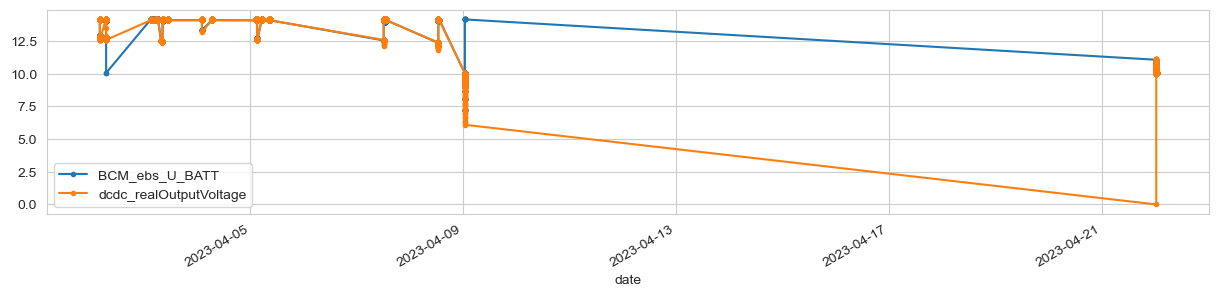

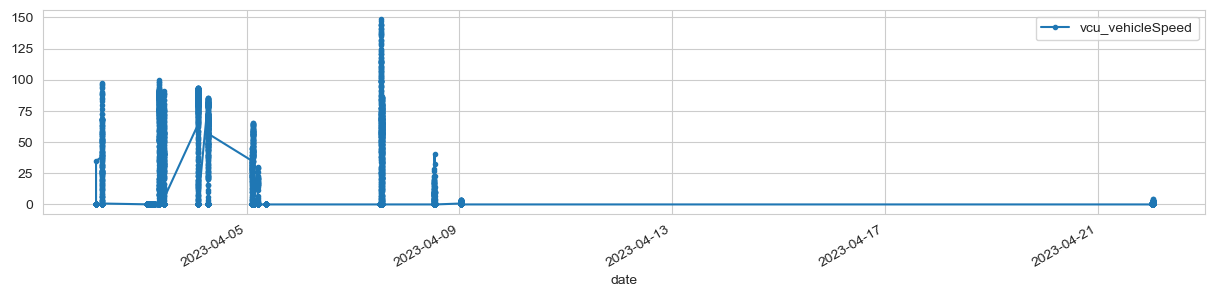

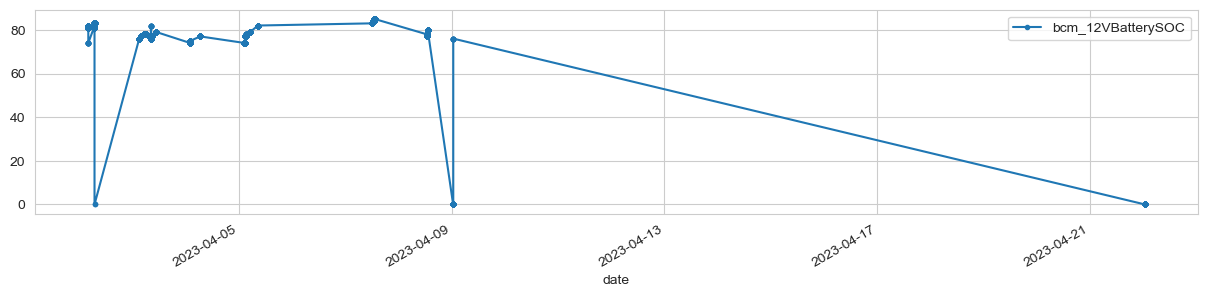

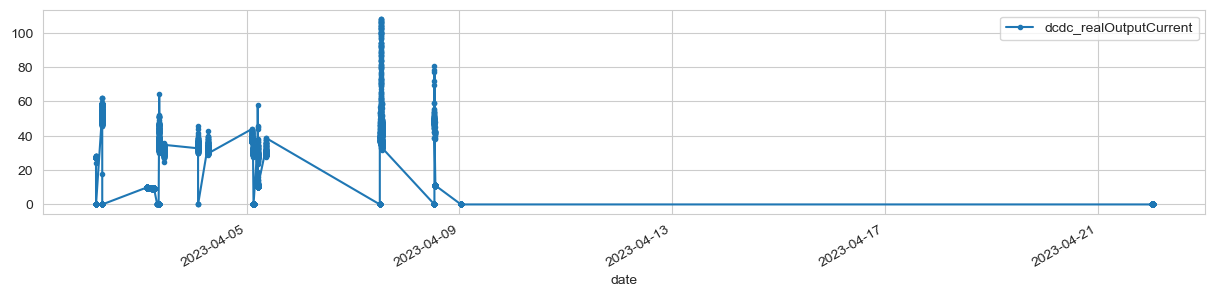

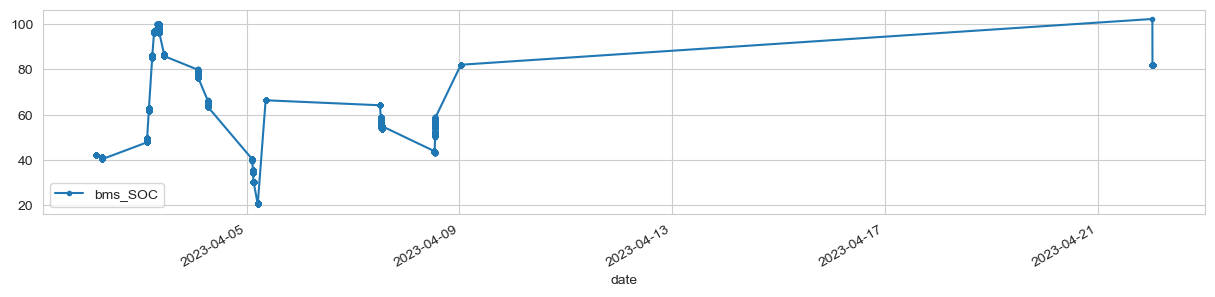

In [14]:
import matplotlib.pyplot as plt

data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["vcu_vehicleSpeed"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["bcm_12VBatterySOC"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["dcdc_realOutputCurrent"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["bms_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))

# extra code – saves the figure for the book
plt.show()

1. DC-DC 有输出的前提是高压上电
2. 当 DC-DC 有输出时，小电瓶电压会很快和其保持一致
3.

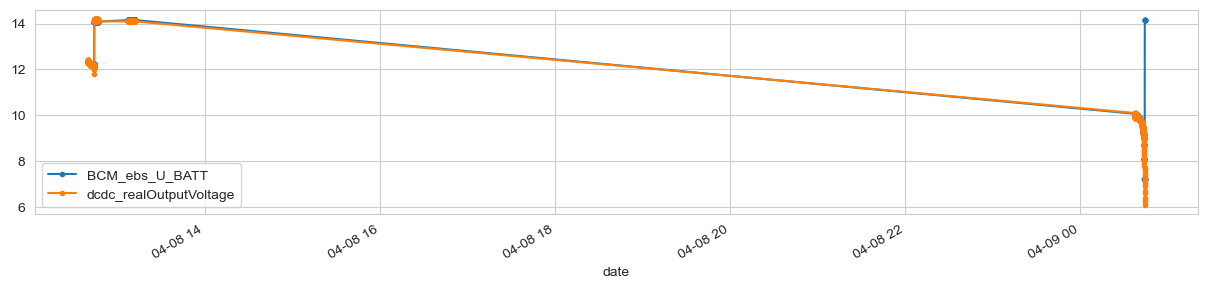

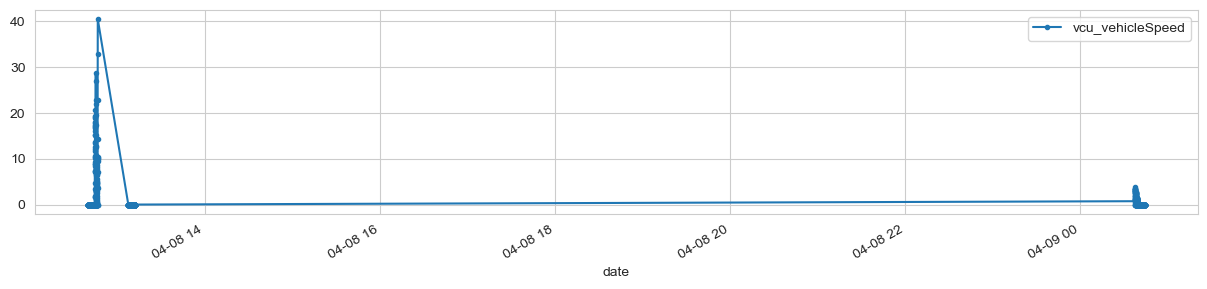

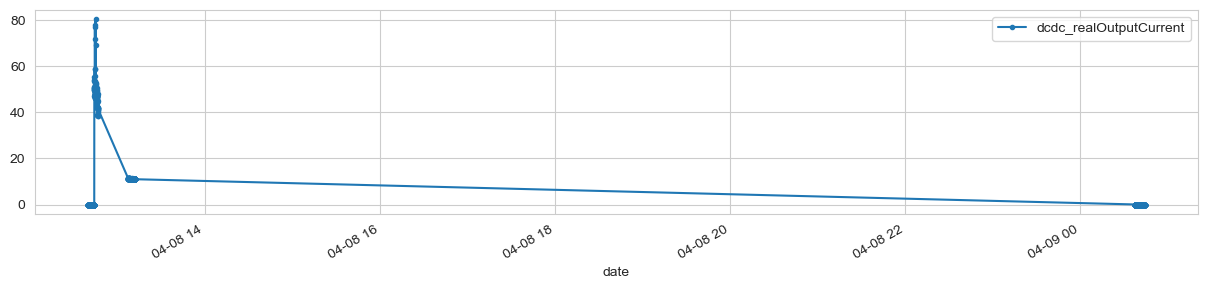

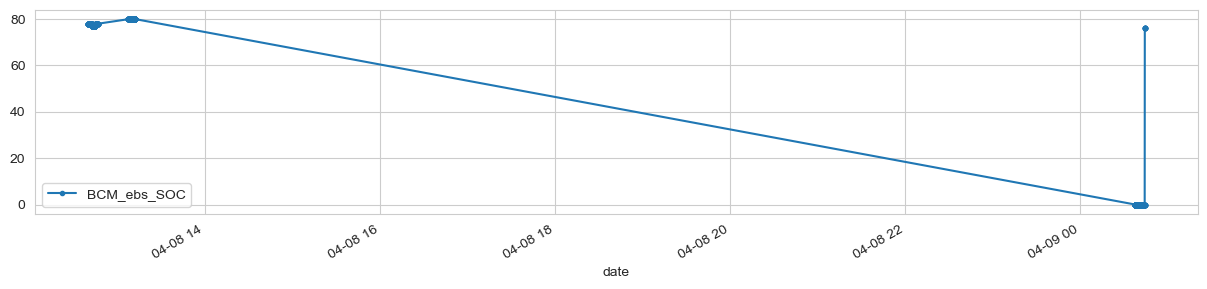

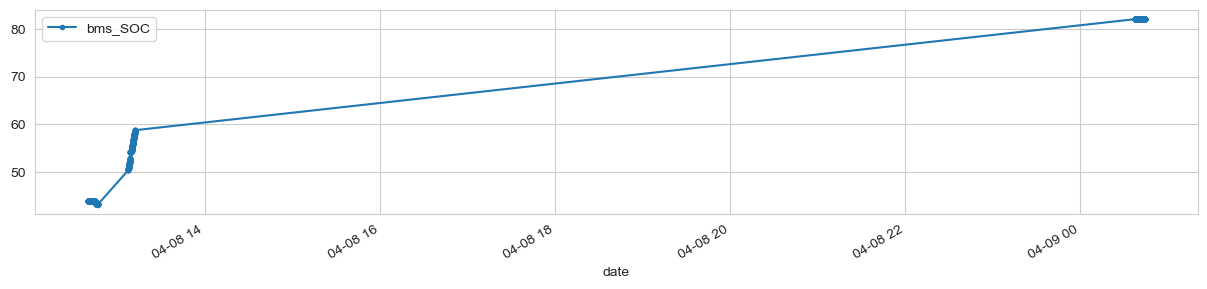

In [18]:
import matplotlib.pyplot as plt

data_copy["2023-04-08 10:00:00":"2023-04-09 11:10:00"][["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

data_copy["2023-04-08 10:00:00":"2023-04-09 11:10:00"][["vcu_vehicleSpeed"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-08 10:00:00":"2023-04-09 11:10:00"][["dcdc_realOutputCurrent"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-08 10:00:00":"2023-04-09 11:10:00"][["BCM_ebs_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-08 10:00:00":"2023-04-09 11:10:00"][["bms_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))

# extra code – saves the figure for the book
plt.show()

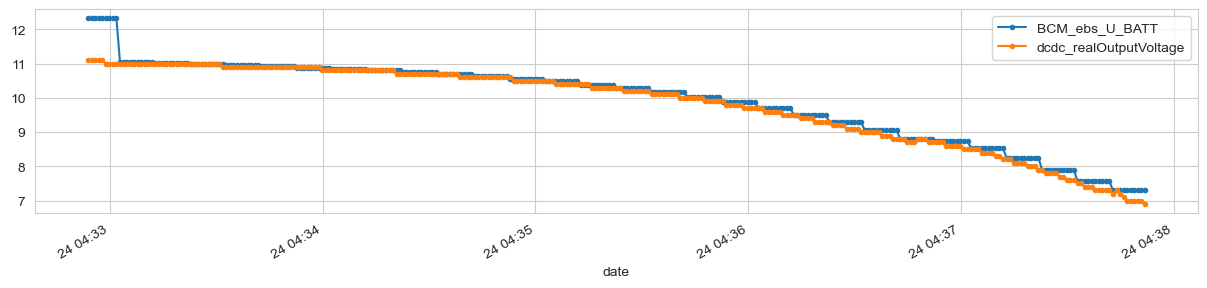

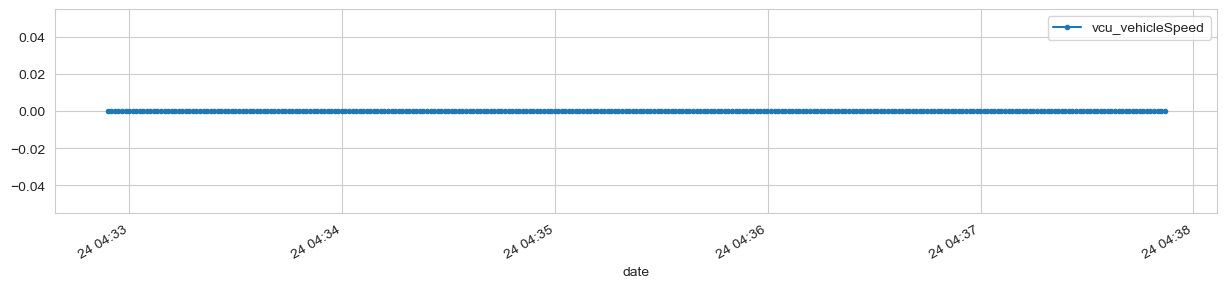

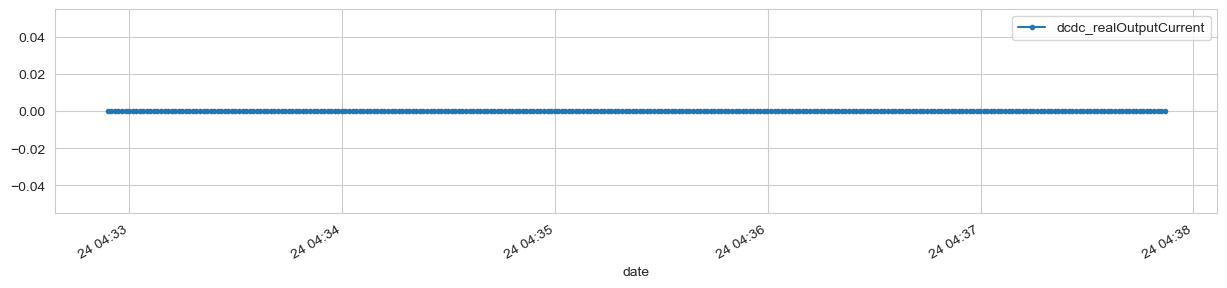

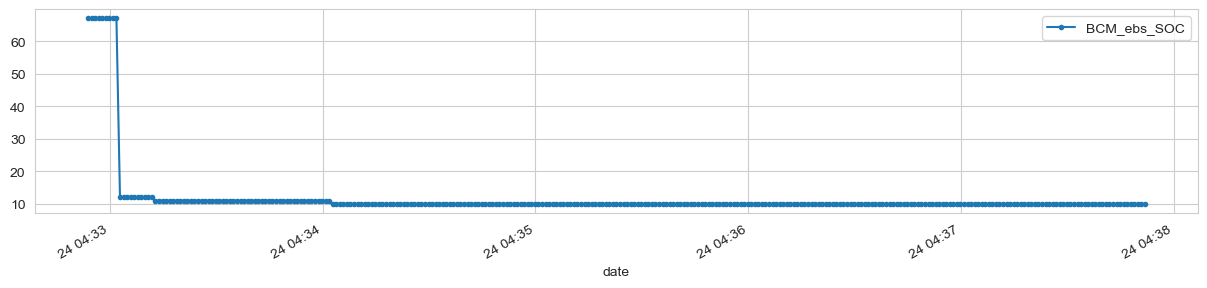

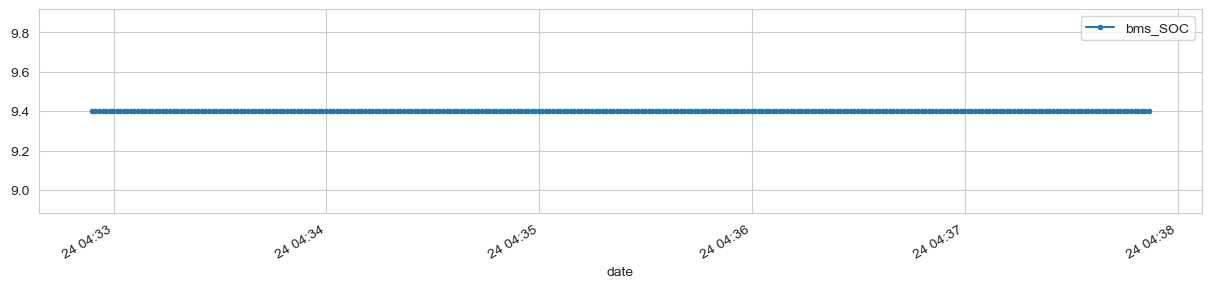

In [14]:
import matplotlib.pyplot as plt

data_copy["2023-04-24 00:00:00":"2023-04-26 09:10:00"][["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

data_copy["2023-04-24 00:00:00":"2023-04-26 09:10:00"][["vcu_vehicleSpeed"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-24 00:00:00":"2023-04-26 09:10:00"][["dcdc_realOutputCurrent"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-24 00:00:00":"2023-04-26 09:10:00"][["BCM_ebs_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-24 00:00:00":"2023-04-26 09:10:00"][["bms_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))

# extra code – saves the figure for the book
plt.show()